# Proceso ETL y EDA para Cars Sales

In [1]:
import pandas as pd
import numpy as np


#### Este fragmento de código carga un archivo CSV de datos de ventas de autos, convirtiendo la columna de fechas en un formato adecuado para su análisis.

In [13]:
data = pd.read_csv(r"C:\Users\Admin\Documents\Cars Sales\Archivo csv\Auto Sales data.csv", 
    parse_dates=['ORDERDATE'], 
    dayfirst=True)

In [14]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


### Elimine "DAYS_SINCE_LASTODER" y creo una nueva columna con la diferencia de tiempo como: DAYS_SINCE_LASTORDER - 06-01-2020.


In [15]:
#Creacion de la nueva columna DAYS_SINCE_LASTORDER basado en la diferencia de tiempo
#Primero elimino la columna existente

data = data.drop('DAYS_SINCE_LASTORDER', axis=1)

#Basado en la diferencia de tiempo creo la nueva columna DAYS_SINCE_LASTORDER

from datetime import datetime
#Especifico la fecha
temp_date = datetime(2020,6,1)
data['DAYS_SINCE_LASTORDER'] = (temp_date - data['ORDERDATE']).dt.days

In [17]:
#Informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   STATUS                2747 non-null   object        
 7   PRODUCTLINE           2747 non-null   object        
 8   MSRP                  2747 non-null   int64         
 9   PRODUCTCODE           2747 non-null   object        
 10  CUSTOMERNAME          2747 non-null   object        
 11  PHONE                 2747 non-null   object        
 12  ADDRESSLINE1          2747 non-null   object        
 13  CITY              

### El conjunto de datos contiene 2747 registros con 20 columnas. 
### Todas las columnas tienen 2747 valores no nulos, por lo tanto, no se encontraron datos faltantes.
### Las columnas clave incluyen detalles de transacciones de ventas, información del cliente, detalles del producto, estado del pedido e información de recencia.
### Los tipos de datos varían entre las columnas, incluyendo flotantes, fechas y objetos.

In [20]:
#Características Numéricas
#Dado que ORDERNUMBER no es relevante para el análisis exploratorio de datos (EDA) aquí
# lo eliminaremos para el análisis exploratorio de datos y visualizaciones.

data_num = data.select_dtypes(include=['float64','int64']).drop(columns=['ORDERNUMBER'])
print(data_num.columns, len(list(data_num.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP',
       'DAYS_SINCE_LASTORDER'],
      dtype='object') 6


In [22]:
#Características Categóricas
#No necesitamos las siguientes columnas para el análisis, por lo tanto
# las excluiremos de las gráficas: 'PHONE', 'ADDRESSLINE1', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'.

data_cat = data.select_dtypes(include=['object']).drop(columns=['PHONE','ADDRESSLINE1','CONTACTLASTNAME','CONTACTFIRSTNAME'])
print(data_cat.columns, len(list(data_cat.columns.values)))


Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 8


In [23]:
#Descripcion de caracteristicas numericas
display(round(data_num.describe(),2).T)

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
PRICEEACH,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
ORDERLINENUMBER,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
SALES,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
MSRP,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00
DAYS_SINCE_LASTORDER,2747.0,384.09,230.23,1.00,197.00,343.00,571.00,877.00


In [26]:
#Descripcion de caracteristicas de categoria
data_cat.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
DEALSIZE,2747,3,Medium,1349


 ## Análisis de columnas numericas y categoricas

Monto de Ventas: El monto promedio de ventas por transacción es aproximadamente 3,553. Los clientes realizan compras que van desde 482.13 hasta 14,082.80.

Cantidad Ordenada: En promedio, los clientes ordenan aproximadamente 35 artículos por transacción, con un mínimo de 6 y un máximo de 97 artículos.

Precio por Artículo: El precio promedio de cada artículo en un pedido es aproximadamente 101. Los precios varían entre un mínimo de 26.88 y un máximo de 252.87.

Precio de Venta Sugerido por el Fabricante (MSRP): El MSRP promedio es aproximadamente 100.69, con precios que oscilan entre 33 y 214.

Estado del Pedido: El estado de pedido más común es "Enviado", ocurriendo 2,541 veces.

Línea de Producto: "Autos Clásicos" es la línea de producto dominante con 949 registros.

Concentración de Clientes: "Euro Shopping Channel" es el cliente principal, con 259 transacciones.

Tendencias Geográficas: "Madrid" y "EE. UU." son la ciudad y el país más frecuentes, respectivamente.

Tamaño de los Tratos: La mayoría de los tratos caen en la categoría "Mediano", representando 1,349 casos.

### Analisis de variables con graficos 

C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\3058614653.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=ax[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\3058614653.py:17: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=ax[0])


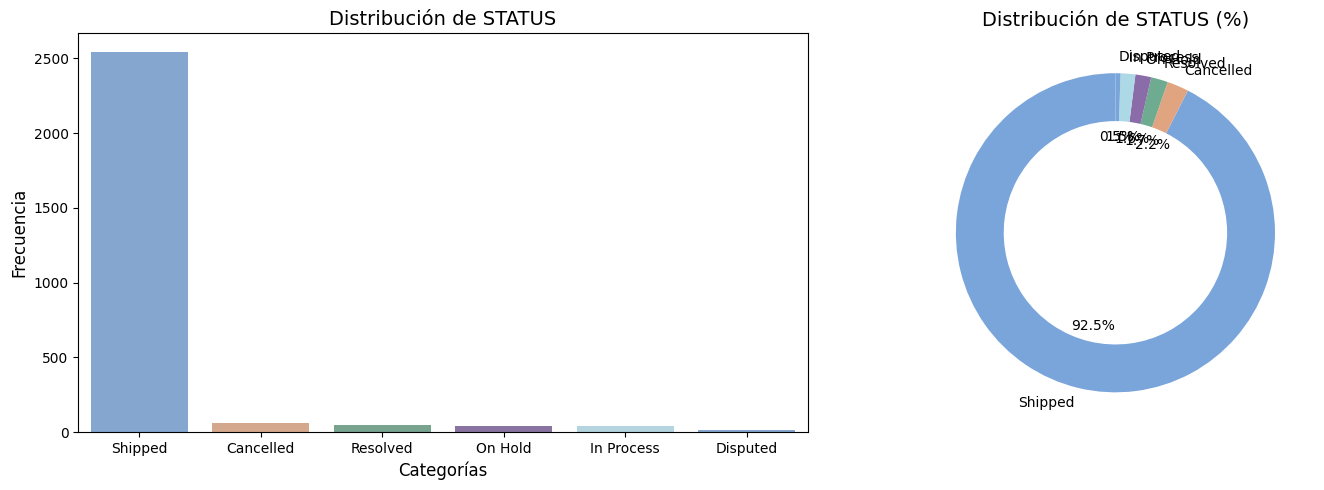

C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\3058614653.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=ax[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\3058614653.py:36: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=ax[0])


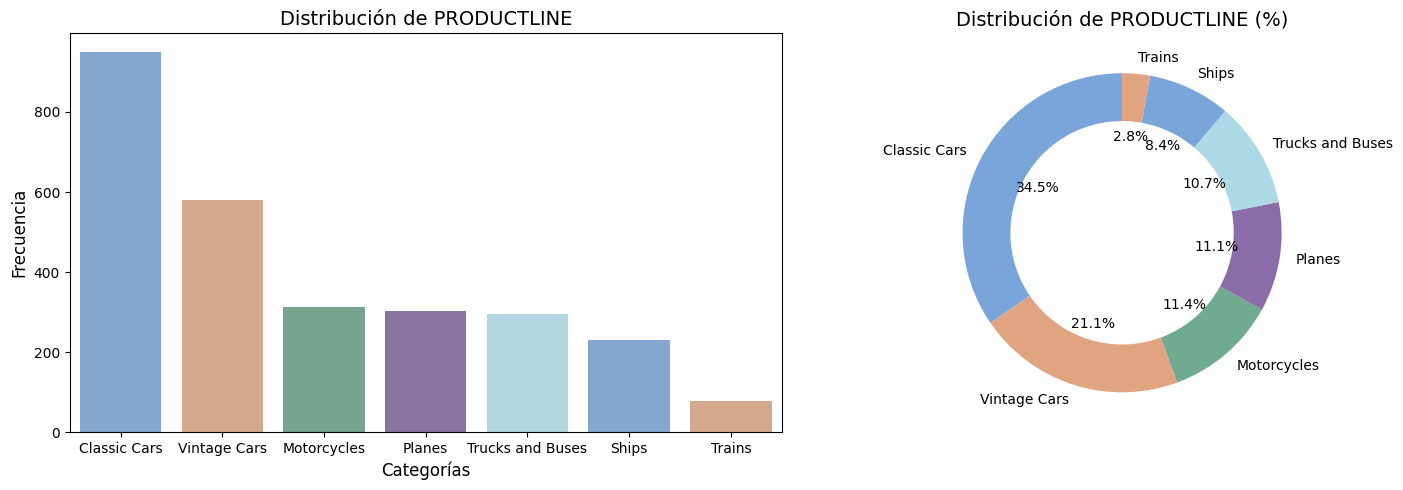

C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\3058614653.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=ax[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\3058614653.py:55: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=ax[0])


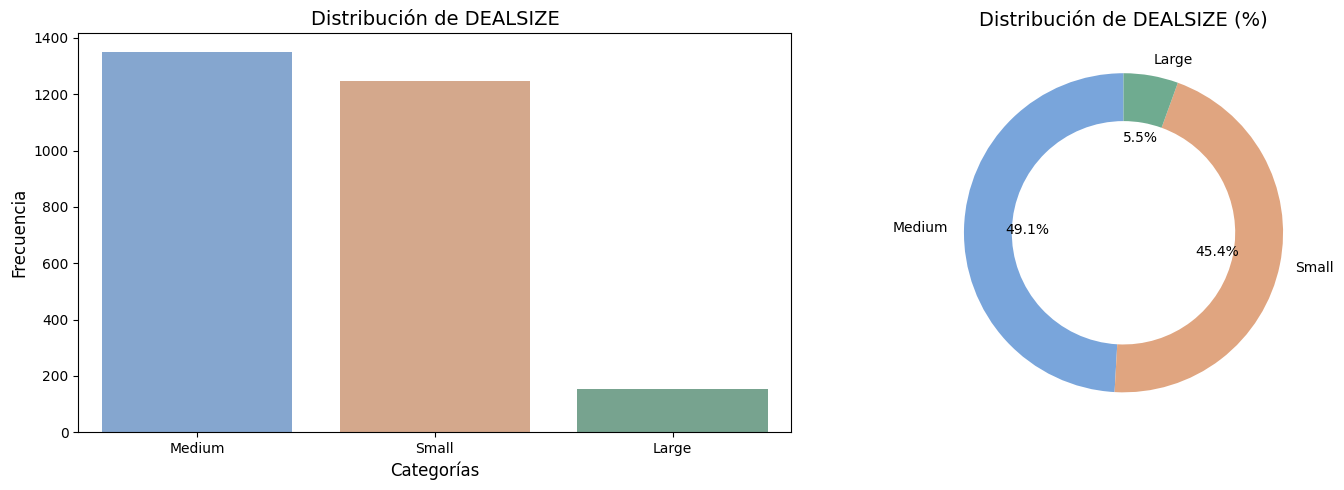

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas categóricas
cat_columns = data[['STATUS', 'PRODUCTLINE', 'DEALSIZE']]

# Colores personalizados
colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']

# Análisis para la columna STATUS
value_counts = cat_columns['STATUS'].value_counts()
percentage = (value_counts / value_counts.sum()) * 100

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras para STATUS
sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=ax[0])
ax[0].set_title('Distribución de STATUS', fontsize=14)
ax[0].set_xlabel('Categorías', fontsize=12)
ax[0].set_ylabel('Frecuencia', fontsize=12)

# Gráfico de dona para STATUS
ax[1].pie(percentage, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3),labeldistance=1.1)
ax[1].set_title('Distribución de STATUS (%)', fontsize=14)

plt.tight_layout()
plt.show()

# Repetir para PRODUCTLINE
value_counts = cat_columns['PRODUCTLINE'].value_counts()
percentage = (value_counts / value_counts.sum()) * 100

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras para PRODUCTLINE
sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=ax[0])
ax[0].set_title('Distribución de PRODUCTLINE', fontsize=14)
ax[0].set_xlabel('Categorías', fontsize=12)
ax[0].set_ylabel('Frecuencia', fontsize=12)

# Gráfico de dona para PRODUCTLINE
ax[1].pie(percentage, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))
ax[1].set_title('Distribución de PRODUCTLINE (%)', fontsize=14)

plt.tight_layout()
plt.show()

# Repetir para DEALSIZE
value_counts = cat_columns['DEALSIZE'].value_counts()
percentage = (value_counts / value_counts.sum()) * 100

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras para DEALSIZE
sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors, ax=ax[0])
ax[0].set_title('Distribución de DEALSIZE', fontsize=14)
ax[0].set_xlabel('Categorías', fontsize=12)
ax[0].set_ylabel('Frecuencia', fontsize=12)

# Gráfico de dona para DEALSIZE
ax[1].pie(percentage, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))
ax[1].set_title('Distribución de DEALSIZE (%)', fontsize=14)

plt.tight_layout()
plt.show()


Description of QUANTITYORDERED
----------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


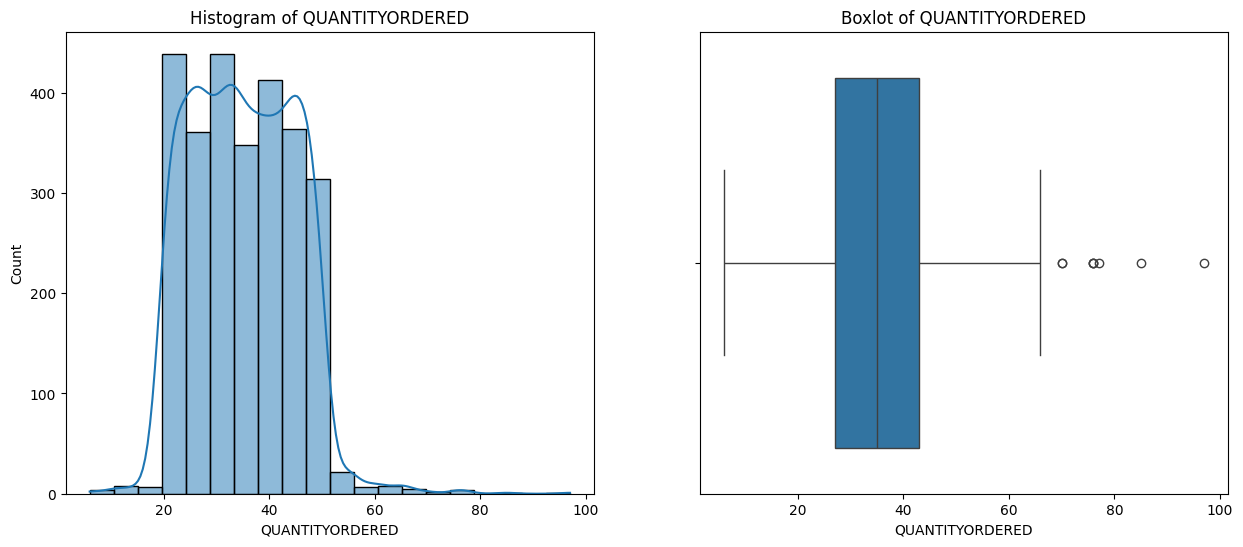

Description of PRICEEACH
----------------------------------------------------------------------------
count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


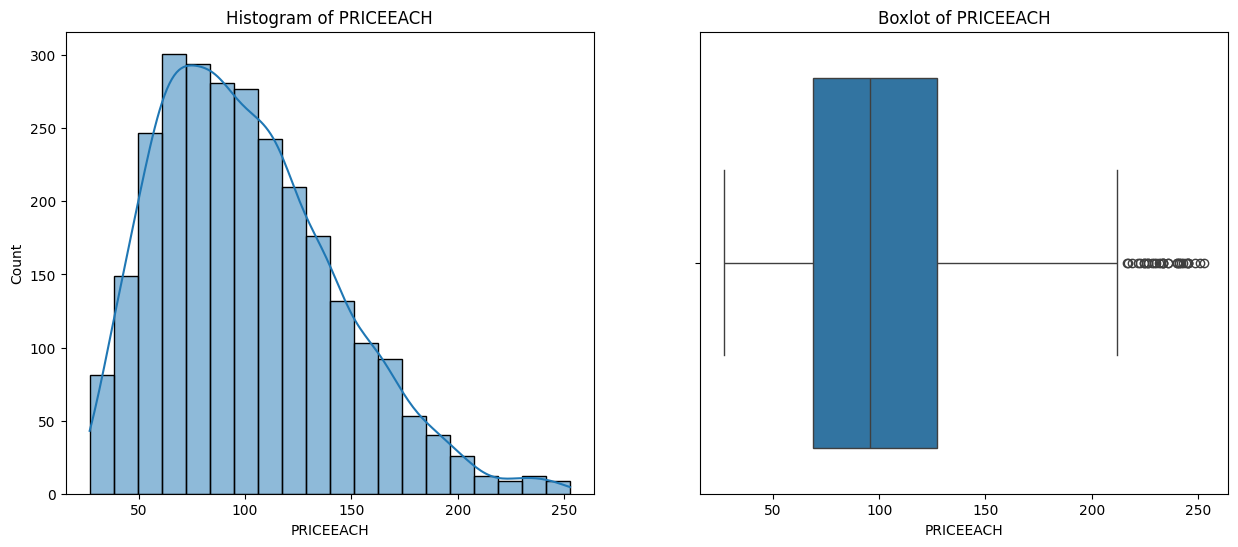

Description of ORDERLINENUMBER
----------------------------------------------------------------------------
count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


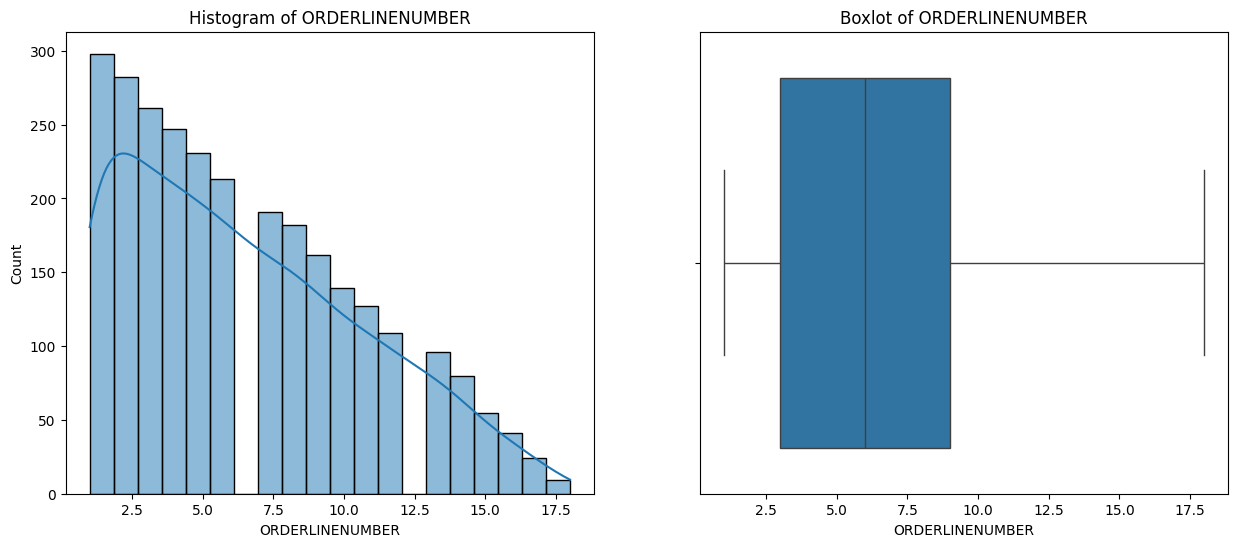

Description of SALES
----------------------------------------------------------------------------
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


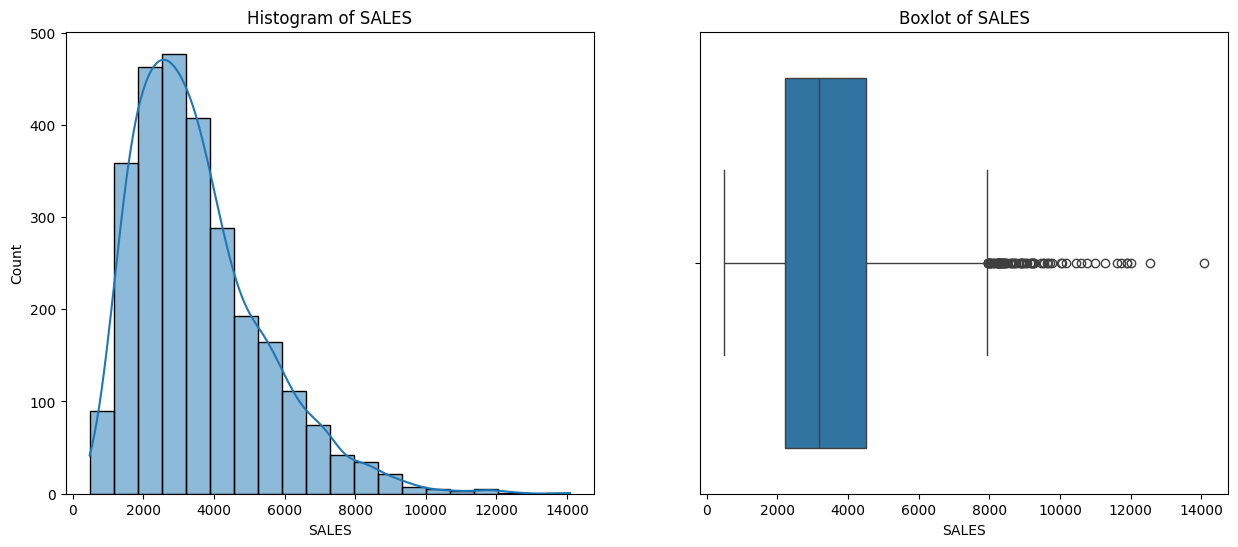

Description of MSRP
----------------------------------------------------------------------------
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


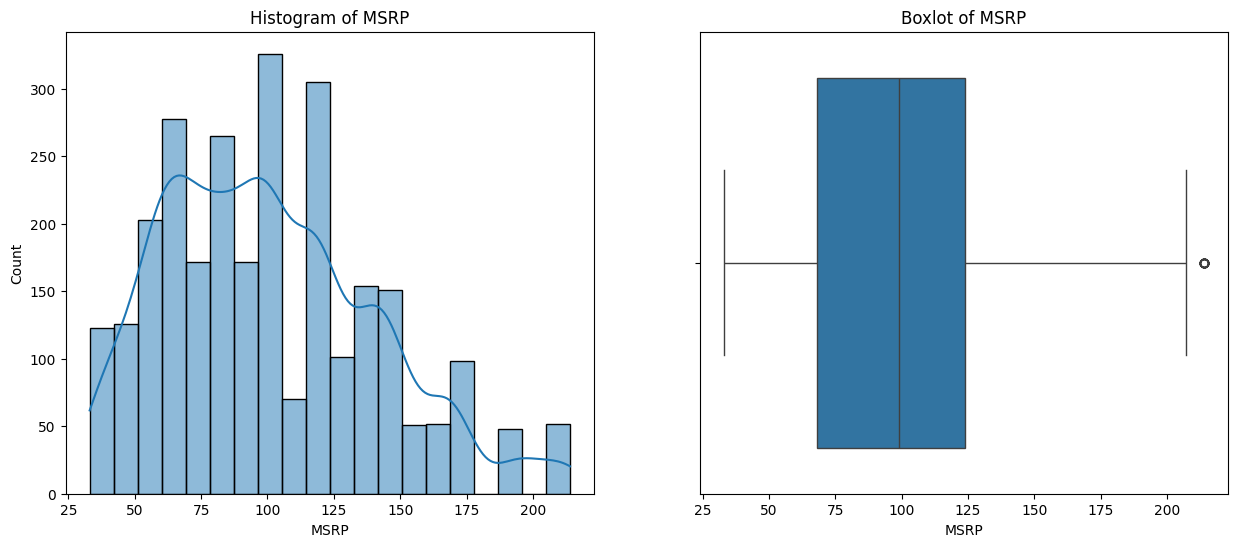

Description of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------
count    2747.000000
mean      384.085912
std       230.231295
min         1.000000
25%       197.000000
50%       343.000000
75%       571.000000
max       877.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


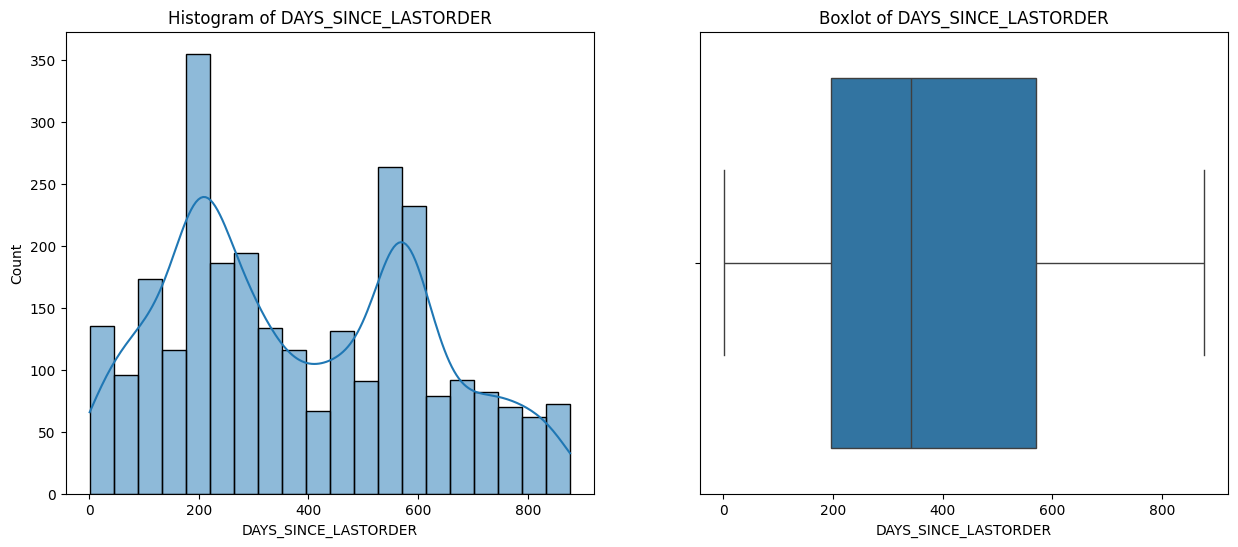

In [30]:
def variable_numericas_analisis(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # Plot histogram
    print("----------------------------------------------------------------------------")
    sns.histplot(data[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)
    # Plot violin plot
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=data[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )
    plt.show()
for x in data_num:
    variable_numericas_analisis(x,20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\1297240272.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


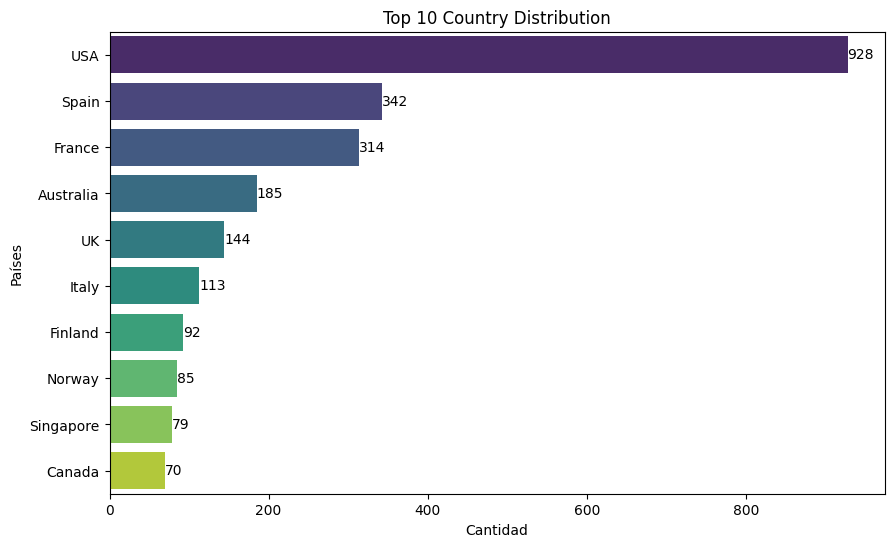

In [32]:
# Obtener los 10 países con más registros en la columna 'COUNTRY'
country_counts = data['COUNTRY'].value_counts()[:10]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title('Top 10 Country Distribution')
plt.xlabel('Cantidad')
plt.ylabel('Países')

# Añadir los valores encima de cada barra
for index, value in enumerate(country_counts.values):
    plt.text(value, index, str(value), va='center')  # Posiciona el texto al lado de cada barra

plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\1474437875.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


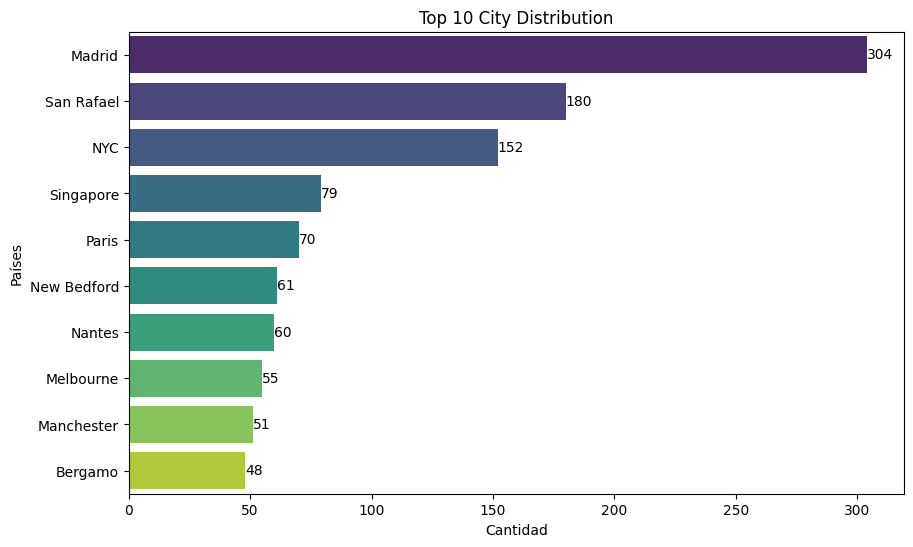

In [33]:
# Obtener las 10 cuidades con más registros en la columna 'CITY'
country_counts = data['CITY'].value_counts()[:10]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title('Top 10 City Distribution')
plt.xlabel('Cantidad')
plt.ylabel('Países')

# Añadir los valores encima de cada barra
for index, value in enumerate(country_counts.values):
    plt.text(value, index, str(value), va='center')  # Posiciona el texto al lado de cada barra

plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\2036523378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")


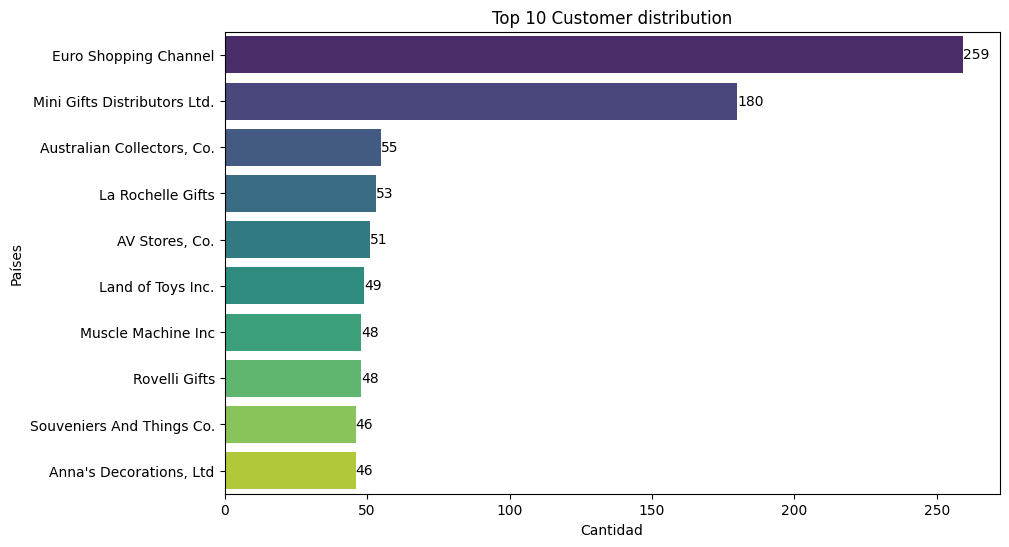

In [34]:
# Obtener los 10 clientes con más registros en la columna 'CUSTOMERNAME'
country_counts = data['CUSTOMERNAME'].value_counts()[:10]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")
plt.title('Top 10 Customer distribution')
plt.xlabel('Cantidad')
plt.ylabel('Países')

# Añadir los valores encima de cada barra
for index, value in enumerate(country_counts.values):
    plt.text(value, index, str(value), va='center')  # Posiciona el texto al lado de cada barra

plt.show()


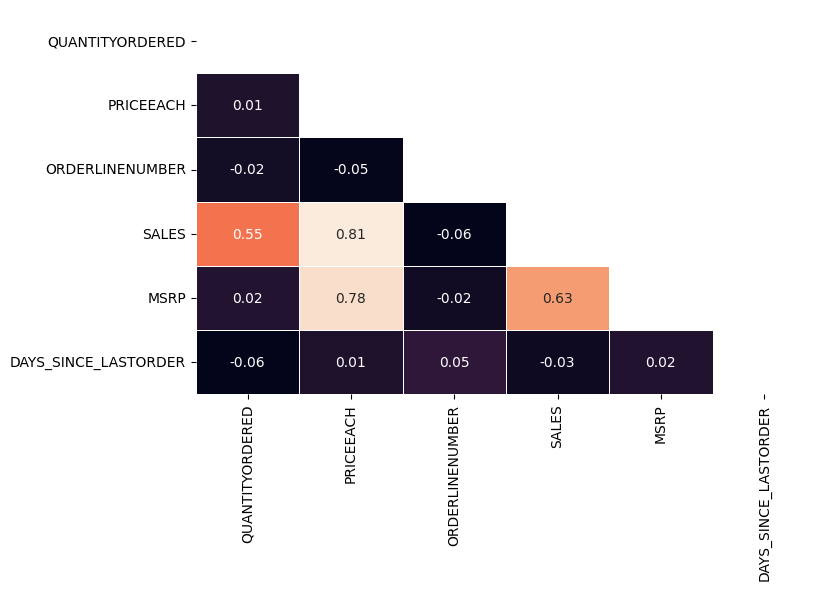

In [35]:
#Mapa de calor (heatmap) de la matriz de correlación de las columnas numéricas en df_num usando el método de Pearson,
# y oculta la mitad superior de la matriz para simplificar la visualización.
corr = data_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask, cbar=None, linewidth=0.5)
plt.show()


Correlación

Cantidad Ordenada y Ventas: Cuando los clientes ordenan más artículos (QUANTITYORDERED), suele estar asociado con mayores ventas (SALES). Es decir, cuanto más compran los clientes, más gana la empresa en ventas.

Precio y Ventas: Existe una fuerte conexión entre el precio de cada artículo (PRICEEACH) y las ventas totales (SALES). Cuando los artículos tienen precios más altos, la empresa tiende a generar más ventas. Así, los precios juegan un papel importante en los ingresos.

MSRP y Precio: El precio al que se venden los artículos (PRICEEACH) está estrechamente relacionado con el precio de venta sugerido por el fabricante (MSRP). En la mayoría de los casos, el precio de venta es bastante similar a lo recomendado por el fabricante.

Días Desde la Última Orden: El tiempo transcurrido desde la última orden de un cliente (DAYS_SINCE_LASTORDER) tiene una conexión débil con la cantidad de artículos ordenados. Los clientes que ordenan con más frecuencia tienden a comprar en menor cantidad, aunque esta relación no es muy fuerte.

## Tendencia de Ventas Anual, Trimestral, Mensual y Semanal.

In [36]:
# Extraer año, mes, semana y trimestre de ORDERDATE
data['Year'] = data['ORDERDATE'].dt.year         # Extrae el año
data['Month'] = data['ORDERDATE'].dt.month       # Extrae el mes
data['Week'] = data['ORDERDATE'].dt.isocalendar().week  # Extrae la semana del año
data['Quarter'] = data['ORDERDATE'].dt.quarter   # Extrae el trimestre

C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\1063641574.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="ORDERDATE", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(data['Year'].unique())))


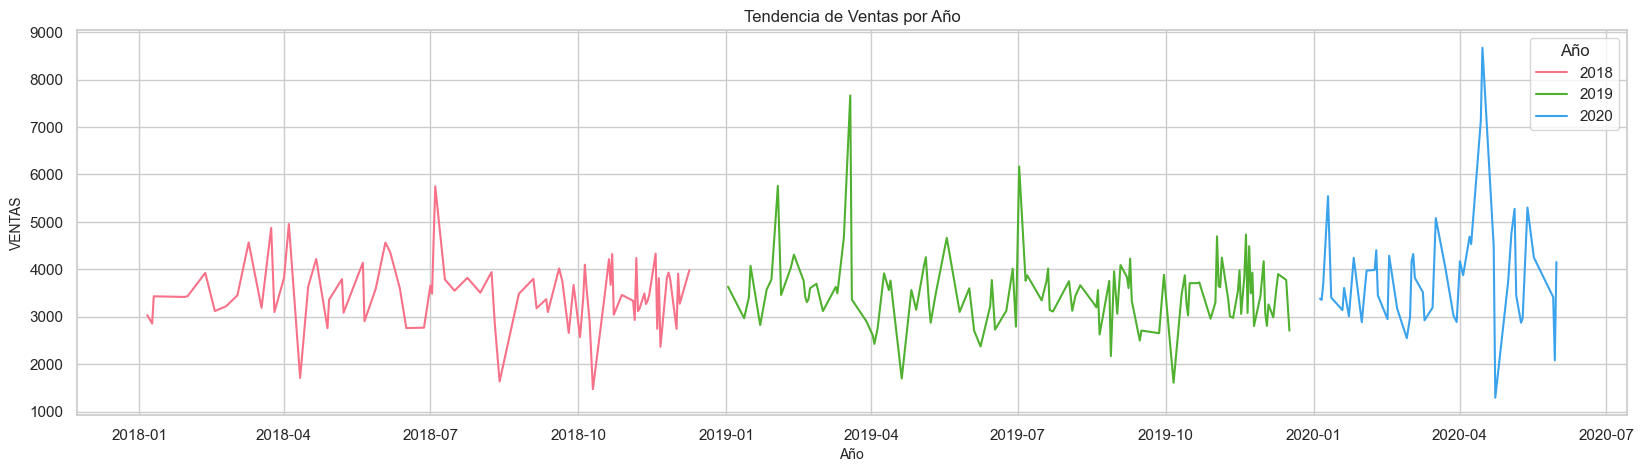

In [38]:
# Tendencia de ventas por año
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})  # Establece el estilo de la gráfica y su tamaño
sns.lineplot(data=data, x="ORDERDATE", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(data['Year'].unique())))
plt.title("Tendencia de Ventas por Año")  # Título de la gráfica
plt.xlabel("Año", fontsize=10)  # Etiqueta del eje x
plt.ylabel("VENTAS", fontsize=10)  # Etiqueta del eje y
plt.legend(title="Año", loc='best')  # Leyenda con el título "Año"
plt.show()  # Muestra la gráfica


C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\1509863624.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="Quarter", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(data['Year'].unique())))


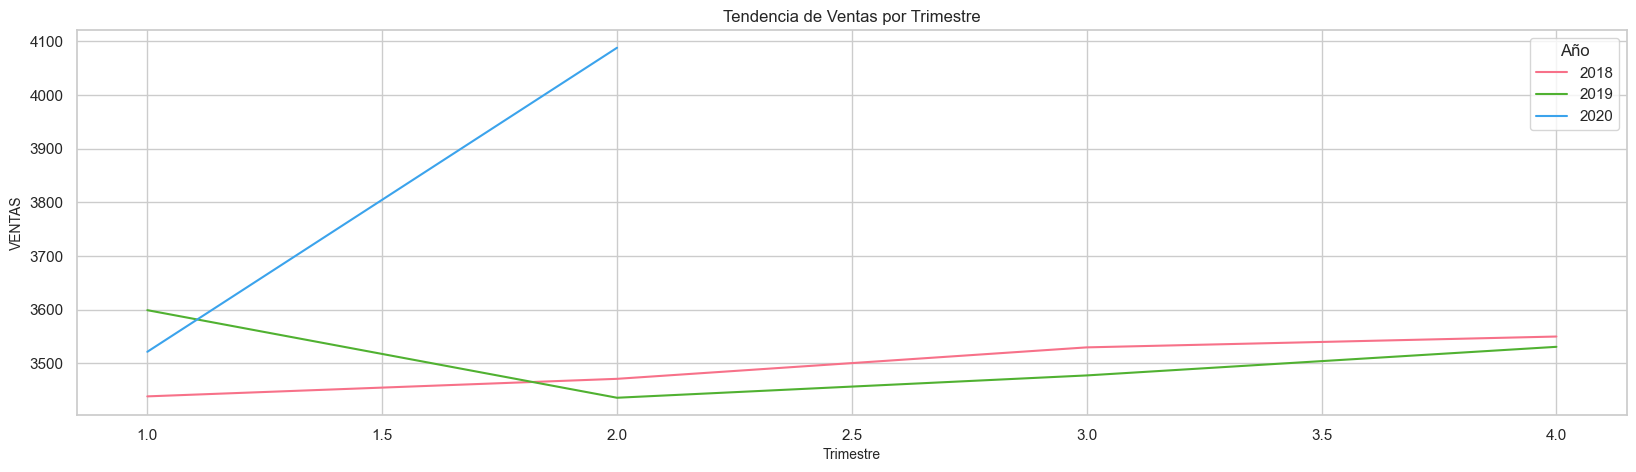

In [39]:
# Tendencia de ventas por trimestre
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})  # Establece el estilo de la gráfica y su tamaño
sns.lineplot(data=data, x="Quarter", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(data['Year'].unique())))
plt.title("Tendencia de Ventas por Trimestre")  # Título de la gráfica
plt.xlabel("Trimestre", fontsize=10)  # Etiqueta del eje x
plt.ylabel("VENTAS", fontsize=10)  # Etiqueta del eje y
plt.legend(title="Año", loc='best')  # Leyenda con el título "Año"
plt.show()  # Muestra la gráfica


C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\835782628.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="Month", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(data['Year'].unique())))


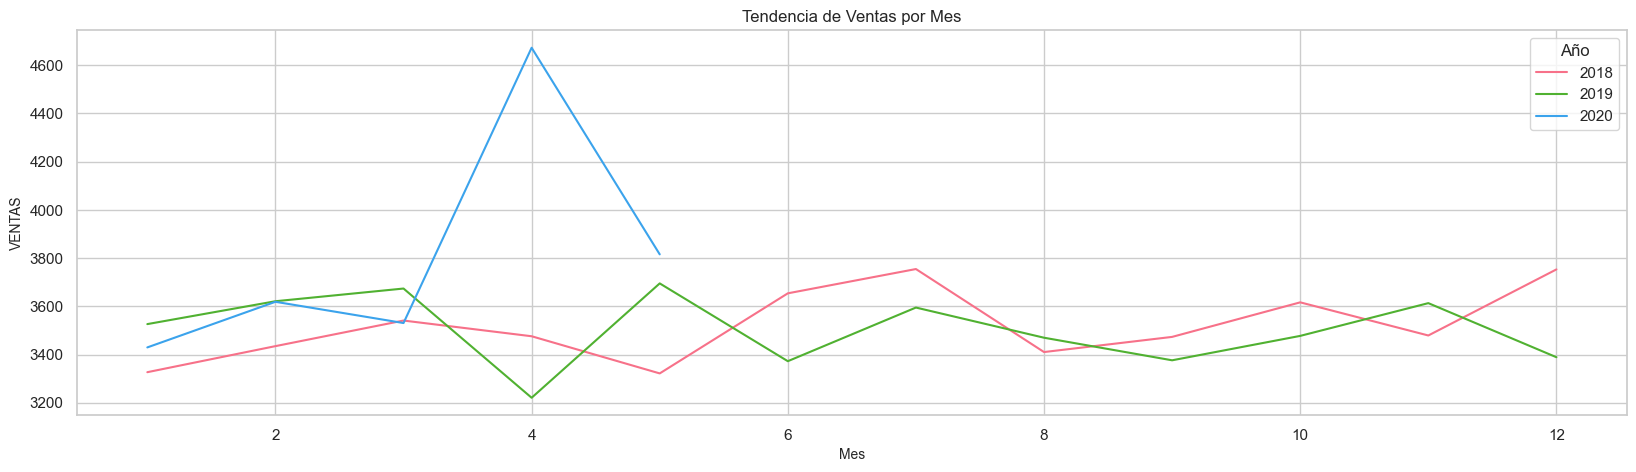

In [40]:
# Tendencia de ventas por mes
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})  # Establece el estilo de la gráfica y su tamaño
sns.lineplot(data=data, x="Month", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(data['Year'].unique())))
plt.title("Tendencia de Ventas por Mes")  # Título de la gráfica
plt.xlabel("Mes", fontsize=10)  # Etiqueta del eje x
plt.ylabel("VENTAS", fontsize=10)  # Etiqueta del eje y
plt.legend(title="Año", loc='best')  # Leyenda con el título "Año"
plt.show()  # Muestra la gráfica


C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\2856640339.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="Week", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(data['Year'].unique())))


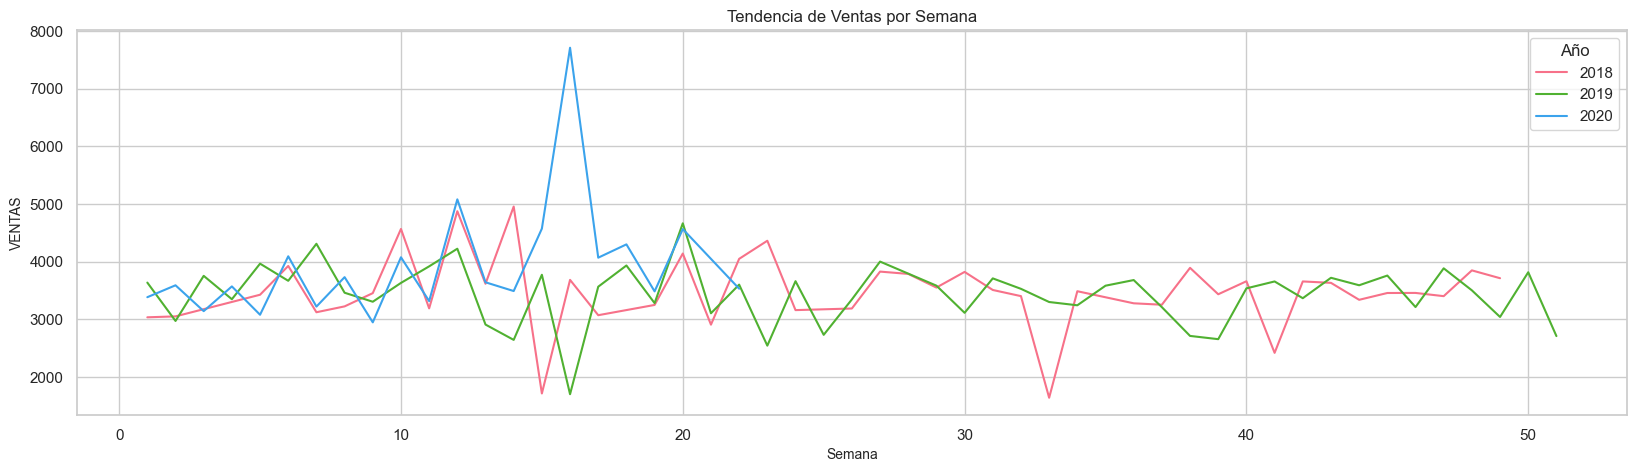

In [41]:
# Tendencia de ventas por semana
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})  # Establece el estilo de la gráfica y su tamaño
sns.lineplot(data=data, x="Week", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(data['Year'].unique())))
plt.title("Tendencia de Ventas por Semana")  # Título de la gráfica
plt.xlabel("Semana", fontsize=10)  # Etiqueta del eje x
plt.ylabel("VENTAS", fontsize=10)  # Etiqueta del eje y
plt.legend(title="Año", loc='best')  # Leyenda con el título "Año"
plt.show()  # Muestra la gráfica


## Analisis de Multivariables

C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\1826074543.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="PRODUCTLINE", y="VENTAS (K)", hue="DEALSIZE", palette="Set2", ci=None)


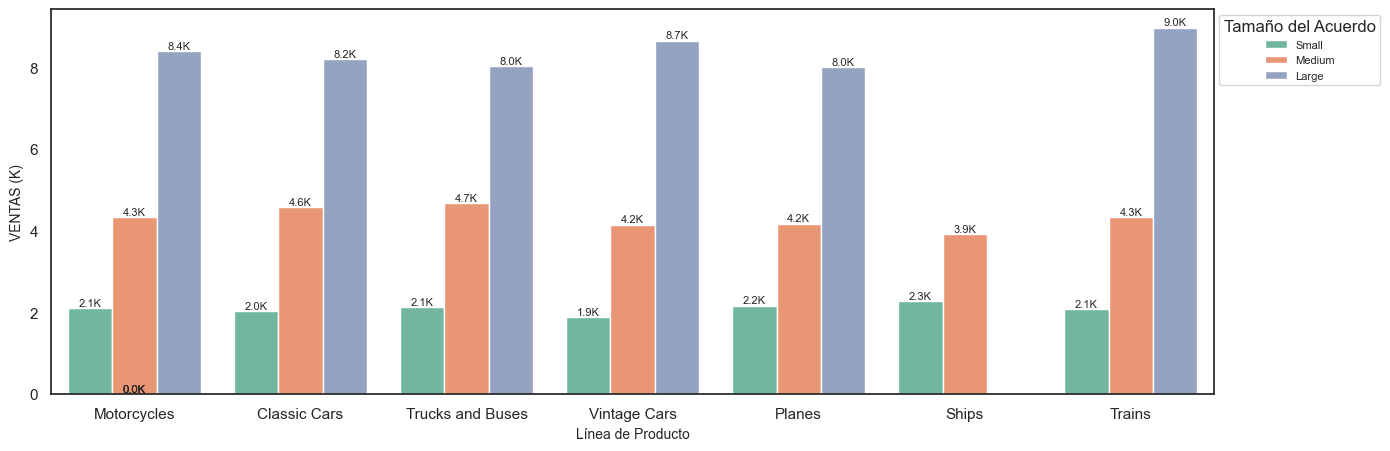

In [42]:
# Comparación entre Ventas, Línea de Producto junto con el Tamaño del Acuerdo como Hue
sns.set(style="white", rc={"figure.figsize": (15, 5)})
data["VENTAS (K)"] = data["SALES"] / 1000
sns.barplot(data=data, x="PRODUCTLINE", y="VENTAS (K)", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("VENTAS (K)", fontsize=10)
plt.xlabel("Línea de Producto", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Tamaño del Acuerdo", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\2708778868.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="PRODUCTLINE", y="QUANTITYORDERED", hue="DEALSIZE", palette="Set2", ci=None)


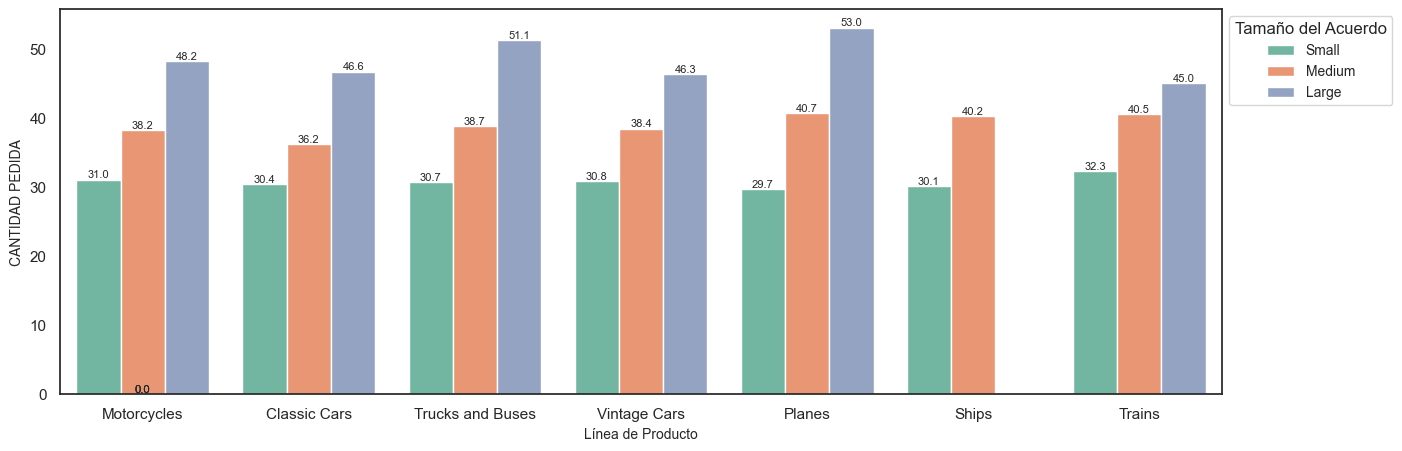

In [43]:
# Comparación entre Cantidad Pedida, Línea de Producto junto con el Tamaño del Acuerdo como Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=data, x="PRODUCTLINE", y="QUANTITYORDERED", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("CANTIDAD PEDIDA", fontsize=10)
plt.xlabel("Línea de Producto", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Tamaño del Acuerdo", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\4161643013.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="PRODUCTLINE", y="PRICEEACH", hue="DEALSIZE", palette="Set2", ci=None)


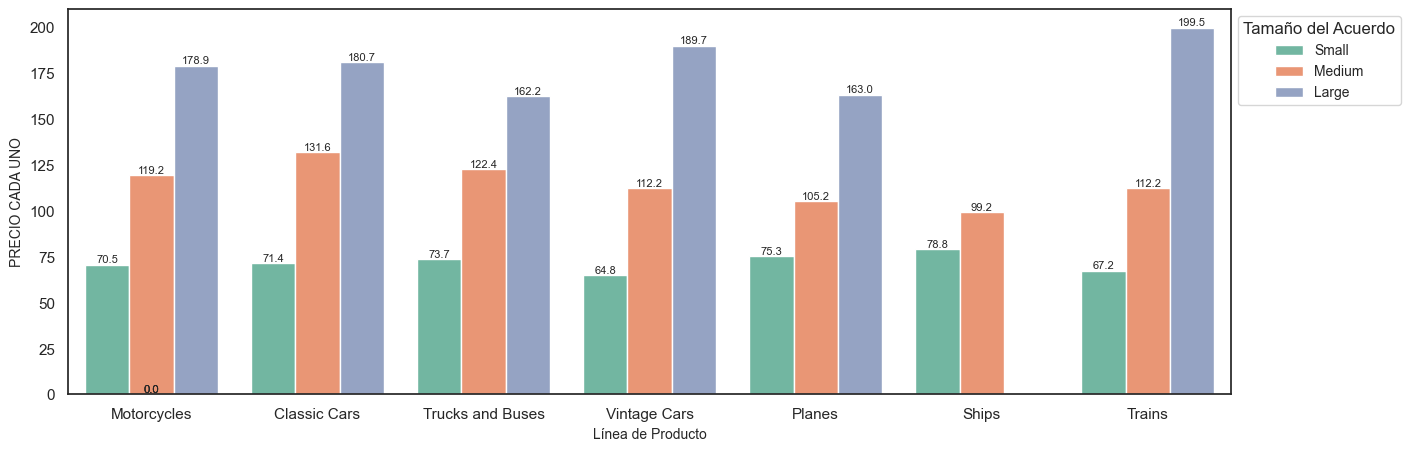

In [44]:
# Comparación entre Precio por Unidad, Línea de Producto junto con el Tamaño del Acuerdo como Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=data, x="PRODUCTLINE", y="PRICEEACH", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("PRECIO CADA UNO", fontsize=10)
plt.xlabel("Línea de Producto", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Tamaño del Acuerdo", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\979833433.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="PRODUCTLINE", y="MSRP", hue="DEALSIZE", palette="Set2", ci=None)


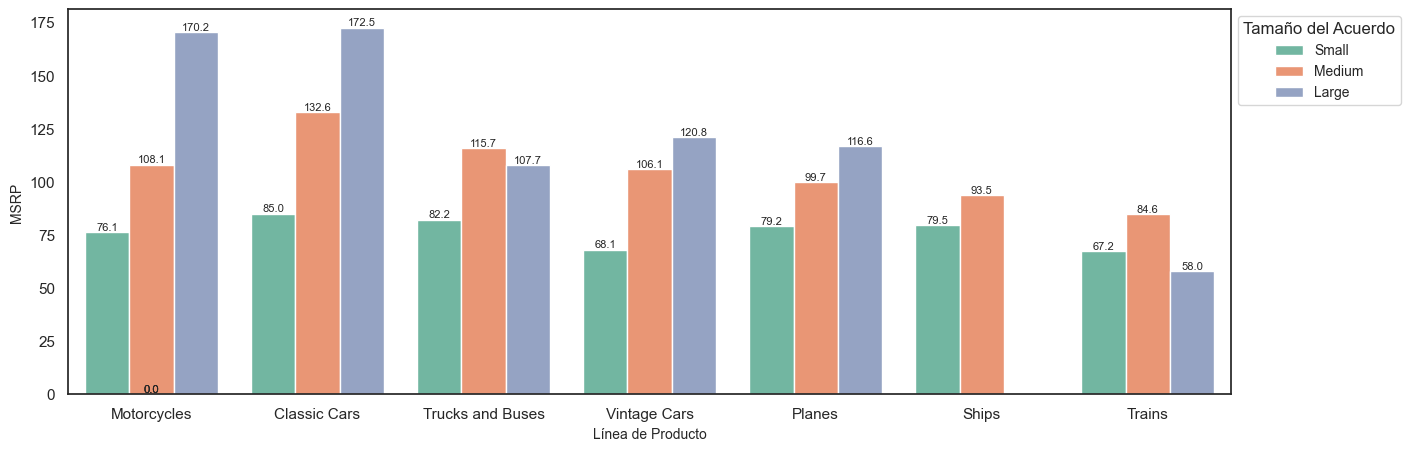

In [45]:
# Comparación entre Cantidad Pedida, Línea de Producto junto con el Tamaño del Acuerdo como Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=data, x="PRODUCTLINE", y="MSRP", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("MSRP", fontsize=10)
plt.xlabel("Línea de Producto", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Tamaño del Acuerdo", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\3005386042.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="PRODUCTLINE", y="VENTAS (K)", hue="Year",  ci=None)


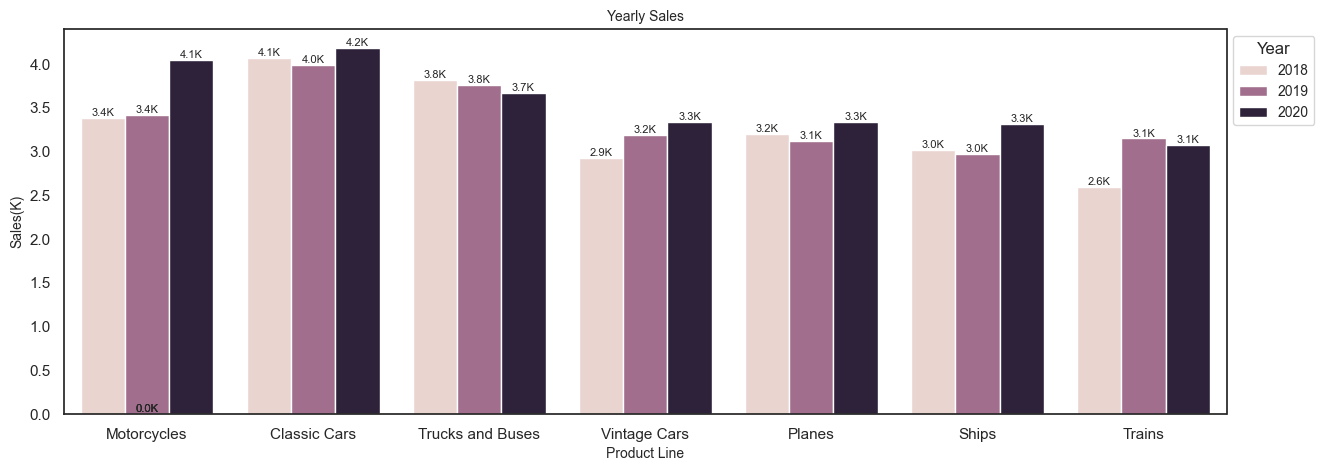

In [48]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=data, x="PRODUCTLINE", y="VENTAS (K)", hue="Year",  ci=None)
plt.xlabel("Product Line", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\2656152007.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="DEALSIZE", y="VENTAS (K)", hue="Year", ci=None)


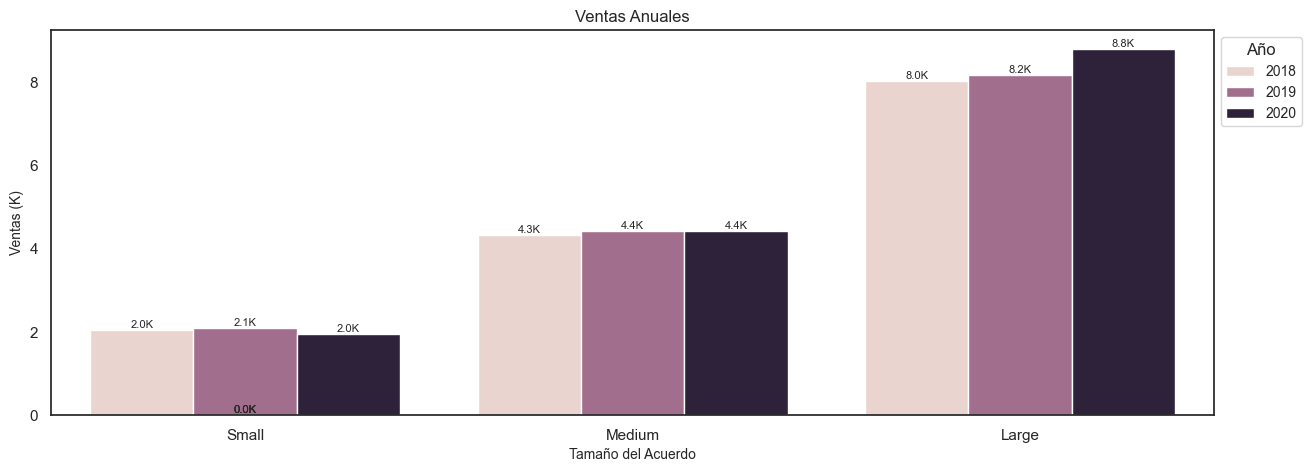

In [49]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=data, x="DEALSIZE", y="VENTAS (K)", hue="Year", ci=None)
plt.xlabel("Tamaño del Acuerdo", fontsize=10)
plt.ylabel("Ventas (K)", fontsize=10)
plt.title("Ventas Anuales", fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Año", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\1699440076.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="ORDERDATE", y="PRICEEACH", ci=None, label="Precio Cada Uno", color='blue')
C:\Users\Admin\AppData\Local\Temp\ipykernel_13344\1699440076.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="ORDERDATE", y="MSRP", ci=None, label="MSRP", color='orange')


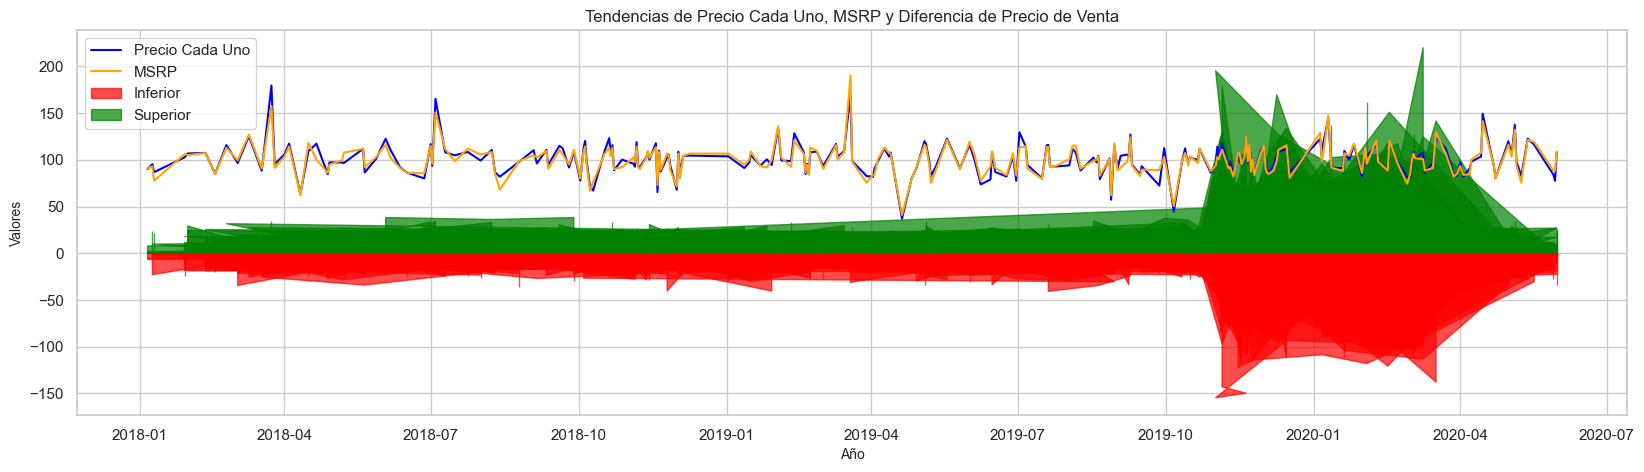

In [50]:
# Tendencia de Precio, MSRP y Diferencia de Precio de Venta
# La diferencia de precio de venta se calcula como la diferencia entre el precio sugerido por el fabricante y el precio de venta
data["DIFERENCIA_PRECIO_VENTA"] = data["PRICEEACH"] - data["MSRP"]
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=data, x="ORDERDATE", y="PRICEEACH", ci=None, label="Precio Cada Uno", color='blue')
sns.lineplot(data=data, x="ORDERDATE", y="MSRP", ci=None, label="MSRP", color='orange')
plt.fill_between(data["ORDERDATE"], data["DIFERENCIA_PRECIO_VENTA"], where=(data["DIFERENCIA_PRECIO_VENTA"] < 0), color="red", alpha=0.7, label="Inferior")
plt.fill_between(data["ORDERDATE"], data["DIFERENCIA_PRECIO_VENTA"], where=(data["DIFERENCIA_PRECIO_VENTA"] >= 0), color="green", alpha=0.7, label="Superior")
plt.title("Tendencias de Precio Cada Uno, MSRP y Diferencia de Precio de Venta")
plt.xlabel("Año", fontsize=10)
plt.ylabel("Valores", fontsize=10)
plt.legend(loc='best')
plt.show()


## INSIGHT CLAVES
Resumen de Ventas:

298 pedidos realizados por 89 clientes de 19 países en los últimos 2.5 años.
Estados Unidos lidera en ventas, seguido de España y Francia. Ventas notables de Australia y Singapur en el Hemisferio Este.

Entre las ciudades, Madrid ocupa el primer lugar en ventas, con San Diego y Nueva York en segundo y tercer lugar, respectivamente.

En el Hemisferio Este, las ventas de Australia y Singapur disminuyeron, mientras que se añadieron clientes de Japón en 2019.

Se observó un aumento significativo en las ventas en EE. UU. y Francia en 2019.

Producto y Ingresos:

La empresa fabrica 109 piezas de automóviles bajo 7 líneas de productos, con precios que varían de 26 a 252.
Las piezas de automóviles clásicos generan los máximos ingresos a través de ventas (aproximadamente el 40%).
Las piezas de automóviles, camiones, autobuses y motocicletas representan el 80% de los ingresos de la empresa.

Tendencias de Ventas:

Tendencia de ventas en aumento con estacionalidad mensual. Ventas máximas en octubre y noviembre cada año.
Mayor actividad de ventas y de clientes en los primeros meses de 2020 en comparación con años anteriores.

Preocupaciones:

No se han añadido nuevos clientes desde septiembre de 2019.

Características de las Transacciones:

La mayoría de los acuerdos son de tamaño medio y pequeño, con transacciones que típicamente contienen entre 20 y 50 artículos.

Clientes Clave:

Euro Shopping Channel y Mini Gifts Distribution Ltd. son los mejores clientes (mayor gasto, más frecuentes y recientes).

Retención de Clientes:

Se observó una buena tasa de retención de clientes de aproximadamente el 90% en 2019.